In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('athlete_events.csv')
df_region = pd.read_csv('noc_regions.csv')

In [3]:
df.head()

ID                      Name Sex   Age  Height  Weight            Team  \
0   1                 A Dijiang   M  24.0   180.0    80.0           China   
1   2                  A Lamusi   M  23.0   170.0    60.0           China   
2   3       Gunnar Nielsen Aaby   M  24.0     NaN     NaN         Denmark   
3   4      Edgar Lindenau Aabye   M  34.0     NaN     NaN  Denmark/Sweden   
4   5  Christine Jacoba Aaftink   F  21.0   185.0    82.0     Netherlands   

   NOC        Games  Year  Season       City          Sport  \
0  CHN  1992 Summer  1992  Summer  Barcelona     Basketball   
1  CHN  2012 Summer  2012  Summer     London           Judo   
2  DEN  1920 Summer  1920  Summer  Antwerpen       Football   
3  DEN  1900 Summer  1900  Summer      Paris     Tug-Of-War   
4  NED  1988 Winter  1988  Winter    Calgary  Speed Skating   

                              Event Medal  
0       Basketball Men's Basketball   NaN  
1      Judo Men's Extra-Lightweight   NaN  
2           Football Men's Football   NaN  
3       Tug-Of-War Men's Tug-Of-War  Gold  
4  Speed Skating Women's 500 metres   NaN

In [4]:
df_region.head()

NOC       region                 notes
0  AFG  Afghanistan                   NaN
1  AHO      Curacao  Netherlands Antilles
2  ALB      Albania                   NaN
3  ALG      Algeria                   NaN
4  AND      Andorra                   NaN

In [5]:
df.shape

(271116, 15)

In [6]:
df = df[df['Season']=='Summer']

In [7]:
df = df.merge(df_region,on='NOC',how='left')
df.tail()

ID                          Name Sex   Age  Height  Weight  \
222547  135565      Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566    James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567  Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567  Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568        Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                 Team  NOC        Games  Year  Season            City  \
222547      Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548  United States  USA  1972 Summer  1972  Summer          Munich   
222549         Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550         Russia  RUS  2004 Summer  2004  Summer          Athina   
222551        Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal     region  \
222547      Hockey                     Hockey Men's Hockey   NaN  Argentina   
222548    Football                 Football Men's Football   NaN        USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN     Russia   
222551  Basketball           Basketball Women's Basketball   NaN    Belarus   

       notes  
222547   NaN  
222548   NaN  
222549   NaN  
222550   NaN  
222551   NaN

In [8]:
df['region'].value_counts()

USA            15064
Germany        12377
UK             10917
France         10633
Russia          8855
               ...  
Kiribati          11
Brunei            10
Timor-Leste        8
Kosovo             8
South Sudan        3
Name: region, Length: 205, dtype: int64

In [9]:
df.isnull().sum()

ID             0
Name           0
Sex            0
Age         9189
Height     51857
Weight     53854
Team           0
NOC            0
Games          0
Year           0
Season         0
City           0
Sport          0
Event          0
Medal     188464
region       370
notes     218151
dtype: int64

In [10]:
df.duplicated().sum()

1385

In [11]:
df.drop_duplicates(inplace=True)

In [12]:
df.duplicated().sum()

0

In [13]:
df['Medal'].value_counts()

Gold      11456
Bronze    11409
Silver    11212
Name: Medal, dtype: int64

In [14]:
# Get dummies data for medal data
dummy = pd.get_dummies(df['Medal'])
dummy

Bronze  Gold  Silver
0            0     0       0
1            0     0       0
2            0     0       0
3            0     1       0
4            0     0       0
...        ...   ...     ...
222547       0     0       0
222548       0     0       0
222549       0     0       0
222550       0     0       0
222551       0     0       0

[221167 rows x 3 columns]

In [15]:
df = pd.concat([df,dummy],axis=1)
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [16]:
#df.drop(['region_y','notes_y'],axis='columns',inplace=True)
df.rename(columns={'region_x':'region','notes_x':'notes'},inplace=True)
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [17]:
df.groupby('NOC').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

NOC    Gold  Silver  Bronze
0    USA  2472.0  1333.0  1197.0
1    URS   832.0   635.0   596.0
2    GBR   635.0   729.0   620.0
3    GER   592.0   538.0   649.0
4    ITA   518.0   474.0   454.0
..   ...     ...     ...     ...
225  AHO     0.0     1.0     0.0
226  LBR     0.0     0.0     0.0
227  LCA     0.0     0.0     0.0
228  LES     0.0     0.0     0.0
229  LBA     0.0     0.0     0.0

[230 rows x 4 columns]

In [18]:
df[(df['NOC']=='IND') & (df['Medal']=='Gold')]

ID                    Name Sex   Age  Height  Weight   Team  NOC  \
4186      2699             Shaukat Ali   M  30.0     NaN     NaN  India  IND   
4190      2703        Syed Mushtaq Ali   M  22.0   165.0    61.0  India  IND   
4460      2864     Richard James Allen   M  25.0   172.0     NaN  India  IND   
4461      2864     Richard James Allen   M  30.0   172.0     NaN  India  IND   
4462      2864     Richard James Allen   M  34.0   172.0     NaN  India  IND   
...        ...                     ...  ..   ...     ...     ...    ...  ...   
191759  117232      Dung Dung Sylvanus   M  31.0   160.0    62.0  India  IND   
193964  118553  Carlyle Carrol Tapsell   M  23.0   182.0     NaN  India  IND   
193965  118553  Carlyle Carrol Tapsell   M  27.0   182.0     NaN  India  IND   
205949  125560         Max "Maxie" Vaz   M   NaN     NaN     NaN  India  IND   
219336  133554    Sayed Muhammad Yusuf   M   NaN     NaN     NaN  India  IND   

              Games  Year  Season         City   Sport                Event  \
4186    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4190    1964 Summer  1964  Summer        Tokyo  Hockey  Hockey Men's Hockey   
4460    1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   
4461    1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
4462    1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
...             ...   ...     ...          ...     ...                  ...   
191759  1980 Summer  1980  Summer       Moskva  Hockey  Hockey Men's Hockey   
193964  1932 Summer  1932  Summer  Los Angeles  Hockey  Hockey Men's Hockey   
193965  1936 Summer  1936  Summer       Berlin  Hockey  Hockey Men's Hockey   
205949  1948 Summer  1948  Summer       London  Hockey  Hockey Men's Hockey   
219336  1928 Summer  1928  Summer    Amsterdam  Hockey  Hockey Men's Hockey   

       Medal region notes  Bronze  Gold  Silver  
4186    Gold  India   NaN       0     1       0  
4190    Gold  India   NaN       0     1       0  
4460    Gold  India   NaN       0     1       0  
4461    Gold  India   NaN       0     1       0  
4462    Gold  India   NaN       0     1       0  
...      ...    ...   ...     ...   ...     ...  
191759  Gold  India   NaN       0     1       0  
193964  Gold  India   NaN       0     1       0  
193965  Gold  India   NaN       0     1       0  
205949  Gold  India   NaN       0     1       0  
219336  Gold  India   NaN       0     1       0  

[131 rows x 20 columns]

In [19]:
medal_tally = df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])

In [20]:
medal_tally=medal_tally.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()

In [21]:
medal_tally[medal_tally['region']=='India']

region  Gold  Silver  Bronze
46  India   9.0     7.0    12.0

In [22]:
medal_tally['Total'] = medal_tally['Gold'] + medal_tally['Silver'] + medal_tally['Bronze']

In [23]:
medal_tally

region    Gold  Silver  Bronze   Total
0              USA  1035.0   802.0   708.0  2545.0
1           Russia   592.0   498.0   487.0  1577.0
2          Germany   444.0   457.0   491.0  1392.0
3               UK   278.0   317.0   300.0   895.0
4           France   234.0   256.0   287.0   777.0
..             ...     ...     ...     ...     ...
200        Lesotho     0.0     0.0     0.0     0.0
201        Albania     0.0     0.0     0.0     0.0
202          Libya     0.0     0.0     0.0     0.0
203  Liechtenstein     0.0     0.0     0.0     0.0
204        Liberia     0.0     0.0     0.0     0.0

[205 rows x 5 columns]

### Extract the year in which Summer Olampic is played

In [24]:
years = df['Year'].unique().tolist()

In [25]:
years.sort()

In [26]:
years.insert(0,"Overall")

In [27]:
years

['Overall',
 1896,
 1900,
 1904,
 1906,
 1908,
 1912,
 1920,
 1924,
 1928,
 1932,
 1936,
 1948,
 1952,
 1956,
 1960,
 1964,
 1968,
 1972,
 1976,
 1980,
 1984,
 1988,
 1992,
 1996,
 2000,
 2004,
 2008,
 2012,
 2016]

### Extract Countries from Summer Olampic

In [28]:
country = np.unique(df['region'].dropna().values).tolist()

In [29]:
country.sort()

In [30]:
country.insert(0,'Overall')

In [31]:
country

['Overall',
 'Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Gui

### Make function to fetch medal tally based on Year and Country

In [32]:
def fetch_medal_tally(df,year,country):
    medal_df = df.drop_duplicates(subset=['Team','NOC','Games','Year','Season','City','Sport','Event','Medal'])
    flag=0
    if year == 'Overall' and country == 'Overall':
        temp_df = medal_df
    if year == 'Overall' and country != 'Overall':
        flag=1
        temp_df = medal_df[medal_df['region']==country]
    if year !='Overall' and country == 'Overall':
        temp_df = medal_df[medal_df['Year']==int(year)]
    if year != 'Overall' and country != 'Overall':
        temp_df = medal_df[(medal_df['Year'] == int(year)) & (medal_df['region'] == country)]

        
    if flag == 1:
        x = temp_df.groupby('Year').sum()[['Gold','Silver','Bronze']].sort_values('Year').reset_index()
    else:
        x = temp_df.groupby('region').sum()[['Gold','Silver','Bronze']].sort_values('Gold',ascending=False).reset_index()
    x['Total'] = x['Gold'] + x['Silver'] + x['Bronze']
    print(x)

# Overall Analysis
###       i)   No of editions
###      ii)  No of cities
###      iii) No of events/sports
###      iv) No of atheletes
###      v)  Participating Nation

## No of editions

In [33]:
df 

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [34]:
df['Year'].unique().shape[0]-1

28

## No of cities

In [35]:
df['City'].unique().shape[0]

23

In [36]:
df['City'].unique()

array(['Barcelona', 'London', 'Antwerpen', 'Paris', 'Los Angeles',
       'Helsinki', 'Sydney', 'Atlanta', 'Stockholm', 'Beijing',
       'Rio de Janeiro', 'Athina', 'Mexico City', 'Munich', 'Seoul',
       'Berlin', 'Melbourne', 'Roma', 'Amsterdam', 'Montreal', 'Moskva',
       'Tokyo', 'St. Louis'], dtype=object)

## No of Events/Sports

In [37]:
df['Sport'].unique()

array(['Basketball', 'Judo', 'Football', 'Tug-Of-War', 'Athletics',
       'Swimming', 'Badminton', 'Sailing', 'Gymnastics',
       'Art Competitions', 'Handball', 'Weightlifting', 'Wrestling',
       'Water Polo', 'Hockey', 'Rowing', 'Fencing', 'Equestrianism',
       'Shooting', 'Boxing', 'Taekwondo', 'Cycling', 'Diving', 'Canoeing',
       'Tennis', 'Modern Pentathlon', 'Golf', 'Softball', 'Archery',
       'Volleyball', 'Synchronized Swimming', 'Table Tennis', 'Baseball',
       'Rhythmic Gymnastics', 'Rugby Sevens', 'Trampolining',
       'Beach Volleyball', 'Triathlon', 'Rugby', 'Lacrosse', 'Polo',
       'Cricket', 'Ice Hockey', 'Racquets', 'Motorboating', 'Croquet',
       'Figure Skating', 'Jeu De Paume', 'Roque', 'Basque Pelota',
       'Alpinism', 'Aeronautics'], dtype=object)

In [38]:
df['Sport'].unique().shape[0]

52

In [39]:
df['Event'].unique()

array(["Basketball Men's Basketball", "Judo Men's Extra-Lightweight",
       "Football Men's Football", "Tug-Of-War Men's Tug-Of-War",
       "Athletics Women's 100 metres",
       "Athletics Women's 4 x 100 metres Relay",
       "Swimming Men's 400 metres Freestyle", "Badminton Men's Singles",
       "Sailing Women's Windsurfer",
       "Swimming Men's 200 metres Breaststroke",
       "Swimming Men's 400 metres Breaststroke",
       "Gymnastics Men's Individual All-Around",
       "Gymnastics Men's Team All-Around",
       "Gymnastics Men's Floor Exercise", "Gymnastics Men's Horse Vault",
       "Gymnastics Men's Parallel Bars",
       "Gymnastics Men's Horizontal Bar", "Gymnastics Men's Rings",
       "Gymnastics Men's Pommelled Horse", "Athletics Men's Shot Put",
       'Art Competitions Mixed Sculpturing, Unknown Event',
       "Handball Women's Handball",
       "Weightlifting Women's Super-Heavyweight",
       "Wrestling Men's Light-Heavyweight, Greco-Roman",
       "Gymnastics M

In [40]:
df['Event'].unique().shape[0]

651

## No of Atheletes

In [41]:
df['Name'].unique()

array(['A Dijiang', 'A Lamusi', 'Gunnar Nielsen Aaby', ...,
       'James Francis "Jim" Zylker', 'Aleksandr Viktorovich Zyuzin',
       'Olga Igorevna Zyuzkova'], dtype=object)

In [42]:
df['Name'].unique().shape[0]

116122

## No of Participating Nation

In [43]:
df['region'].unique()

array(['China', 'Denmark', 'Netherlands', 'Finland', 'Norway', 'Romania',
       'Estonia', 'France', 'Morocco', 'Spain', 'Egypt', 'Iran',
       'Bulgaria', 'Italy', 'Chad', 'Azerbaijan', 'Sudan', 'Russia',
       'Argentina', 'Cuba', 'Belarus', 'Greece', 'Cameroon', 'Turkey',
       'Chile', 'Mexico', 'USA', 'Nicaragua', 'Hungary', 'Nigeria',
       'Algeria', 'Kuwait', 'Bahrain', 'Pakistan', 'Iraq', 'Syria',
       'Lebanon', 'Qatar', 'Malaysia', 'Germany', 'Canada', 'Ireland',
       'Australia', 'South Africa', 'Eritrea', 'Tanzania', 'Jordan',
       'Tunisia', 'Libya', 'Belgium', 'Djibouti', 'Palestine', 'Comoros',
       'Kazakhstan', 'Brunei', 'India', 'Saudi Arabia', 'Maldives',
       'Ethiopia', 'United Arab Emirates', 'Yemen', 'Indonesia',
       'Philippines', nan, 'Uzbekistan', 'Kyrgyzstan', 'Tajikistan',
       'Japan', 'Republic of Congo', 'Switzerland', 'Brazil', 'Monaco',
       'Israel', 'Uruguay', 'Sweden', 'Sri Lanka', 'Armenia',
       'Ivory Coast', 'Kenya', 'Ben

In [44]:
df['region'].unique().shape[0]

206

## Plot a Graph of number of participating nation over the year

In [45]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [46]:
nation_over_year = df.drop_duplicates(['Year','region'])['Year'].value_counts().reset_index().sort_values('index')

In [47]:
nation_over_year.rename(columns={'index':'Editions','Year':'No of countries'},inplace=True)

In [48]:
import plotly.express as px

In [49]:
fig = px.line(nation_over_year,x='Editions',y='No of countries')
fig.show()

## Plot a Graph on number of event over the year(Same way as Participating nation over time)

## Plot a Graph on number of Atheletes over the year(Same way as Participating nation over time)

## Plot a Heatmap for the sports over  the year

In [50]:
import seaborn as sns

In [51]:
import matplotlib.pyplot as plt

In [52]:
x=df.drop_duplicates(['Year','Sport','Event'])

In [53]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics             NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Alpinism                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Archery                 NaN   8.0   6.0   NaN   3.0   NaN  10.0   NaN   NaN   
Art Competitions        NaN   NaN   NaN   NaN   NaN   5.0   5.0   5.0  13.0   
Athletics              12.0  23.0  24.0  21.0  26.0  30.0  29.0  27.0  27.0   
Badminton               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Baseball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basketball              NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Basque Pelota           NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Beach Volleyball        NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Boxing                  NaN   NaN   7.0   NaN   5.0   NaN   8.0   8.0   8.0   
Canoeing                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cricket                 NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Croquet                 NaN   3.0   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Cycling                 6.0   3.0   7.0   6.0   6.0   2.0   6.0   6.0   6.0   
Diving                  NaN   NaN   1.0   1.0   2.0   4.0   5.0   5.0   4.0   
Equestrianism           NaN   5.0   NaN   NaN   NaN   5.0   7.0   5.0   6.0   
Fencing                 3.0   7.0   5.0   8.0   4.0   5.0   6.0   7.0   7.0   
Figure Skating          NaN   NaN   NaN   NaN   4.0   NaN   3.0   NaN   NaN   
Football                NaN   1.0   1.0   1.0   1.0   1.0   1.0   1.0   1.0   
Golf                    NaN   2.0   2.0   NaN   NaN   NaN   NaN   NaN   NaN   
Gymnastics              8.0   1.0  12.0   4.0   2.0   4.0   4.0   9.0   8.0   
Handball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Hockey                  NaN   NaN   NaN   NaN   1.0   NaN   1.0   NaN   1.0   
Ice Hockey              NaN   NaN   NaN   NaN   NaN   NaN   1.0   NaN   NaN   
Jeu De Paume            NaN   NaN   NaN   NaN   1.0   NaN   NaN   NaN   NaN   
Judo                    NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Lacrosse                NaN   NaN   1.0   NaN   1.0   NaN   NaN   NaN   NaN   
Modern Pentathlon       NaN   NaN   NaN   NaN   NaN   1.0   1.0   1.0   1.0   
Motorboating            NaN   NaN   NaN   NaN   3.0   NaN   NaN   NaN   NaN   
Polo                    NaN   1.0   NaN   NaN   1.0   NaN   1.0   1.0   NaN   
Racquets                NaN   NaN   NaN   NaN   2.0   NaN   NaN   NaN   NaN   
Rhythmic Gymnastics     NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Roque                   NaN   NaN   1.0   NaN   NaN   NaN   NaN   NaN   NaN   
Rowing                  NaN   4.0   5.0   6.0   4.0   4.0   5.0   7.0   7.0   
Rugby                   NaN   1.0   NaN   NaN   1.0   NaN   1.0   1.0   NaN   
Rugby Sevens            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Sailing                 NaN   8.0   NaN   NaN   4.0   4.0  10.0   3.0   3.0   
Shooting                5.0   8.0   NaN  12.0  15.0  18.0  22.0  10.0   NaN   
Softball                NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Swimming                4.0   7.0  10.0   4.0   6.0   9.0  10.0  11.0  11.0   
Synchronized Swimming   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Table Tennis            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Taekwondo               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tennis                  2.0   4.0   2.0   4.0   6.0   8.0   5.0   5.0   NaN   
Trampolining            NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Triathlon               NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   NaN   
Tug-Of-War              NaN   1.0   1.0   1.0   1.0   1.0   1.0   NaN   NaN   
Volleyball              NaN   NaN   NaN   NaN   Na

In [54]:
x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int')

Year                   1896  1900  1904  1906  1908  1912  1920  1924  1928  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     8     6     0     3     0    10     0     0   
Art Competitions          0     0     0     0     0     5     5     5    13   
Athletics                12    23    24    21    26    30    29    27    27   
Badminton                 0     0     0     0     0     0     0     0     0   
Baseball                  0     0     0     0     0     0     0     0     0   
Basketball                0     0     0     0     0     0     0     0     0   
Basque Pelota             0     1     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     0   
Boxing                    0     0     7     0     5     0     8     8     8   
Canoeing                  0     0     0     0     0     0     0     0     0   
Cricket                   0     1     0     0     0     0     0     0     0   
Croquet                   0     3     0     0     0     0     0     0     0   
Cycling                   6     3     7     6     6     2     6     6     6   
Diving                    0     0     1     1     2     4     5     5     4   
Equestrianism             0     5     0     0     0     5     7     5     6   
Fencing                   3     7     5     8     4     5     6     7     7   
Figure Skating            0     0     0     0     4     0     3     0     0   
Football                  0     1     1     1     1     1     1     1     1   
Golf                      0     2     2     0     0     0     0     0     0   
Gymnastics                8     1    12     4     2     4     4     9     8   
Handball                  0     0     0     0     0     0     0     0     0   
Hockey                    0     0     0     0     1     0     1     0     1   
Ice Hockey                0     0     0     0     0     0     1     0     0   
Jeu De Paume              0     0     0     0     1     0     0     0     0   
Judo                      0     0     0     0     0     0     0     0     0   
Lacrosse                  0     0     1     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     1     1     1   
Motorboating              0     0     0     0     3     0     0     0     0   
Polo                      0     1     0     0     1     0     1     1     0   
Racquets                  0     0     0     0     2     0     0     0     0   
Rhythmic Gymnastics       0     0     0     0     0     0     0     0     0   
Roque                     0     0     1     0     0     0     0     0     0   
Rowing                    0     4     5     6     4     4     5     7     7   
Rugby                     0     1     0     0     1     0     1     1     0   
Rugby Sevens              0     0     0     0     0     0     0     0     0   
Sailing                   0     8     0     0     4     4    10     3     3   
Shooting                  5     8     0    12    15    18    22    10     0   
Softball                  0     0     0     0     0     0     0     0     0   
Swimming                  4     7    10     4     6     9    10    11    11   
Synchronized Swimming     0     0     0     0     0     0     0     0     0   
Table Tennis              0     0     0     0     0     0     0     0     0   
Taekwondo                 0     0     0     0     0     0     0     0     0   
Tennis                    2     4     2     4     6     8     5     5     0   
Trampolining              0     0     0     0     0     0     0     0     0   
Triathlon                 0     0     0     0     0     0     0     0     0   
Tug-Of-War                0     1     1     1     1     1     1     0     0   
Volleyball                0     0     0     0     

<AxesSubplot:xlabel='Year', ylabel='Sport'>

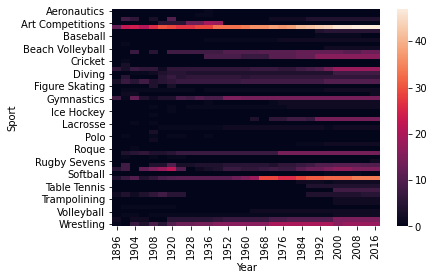

In [55]:
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'))

<AxesSubplot:xlabel='Year', ylabel='Sport'>

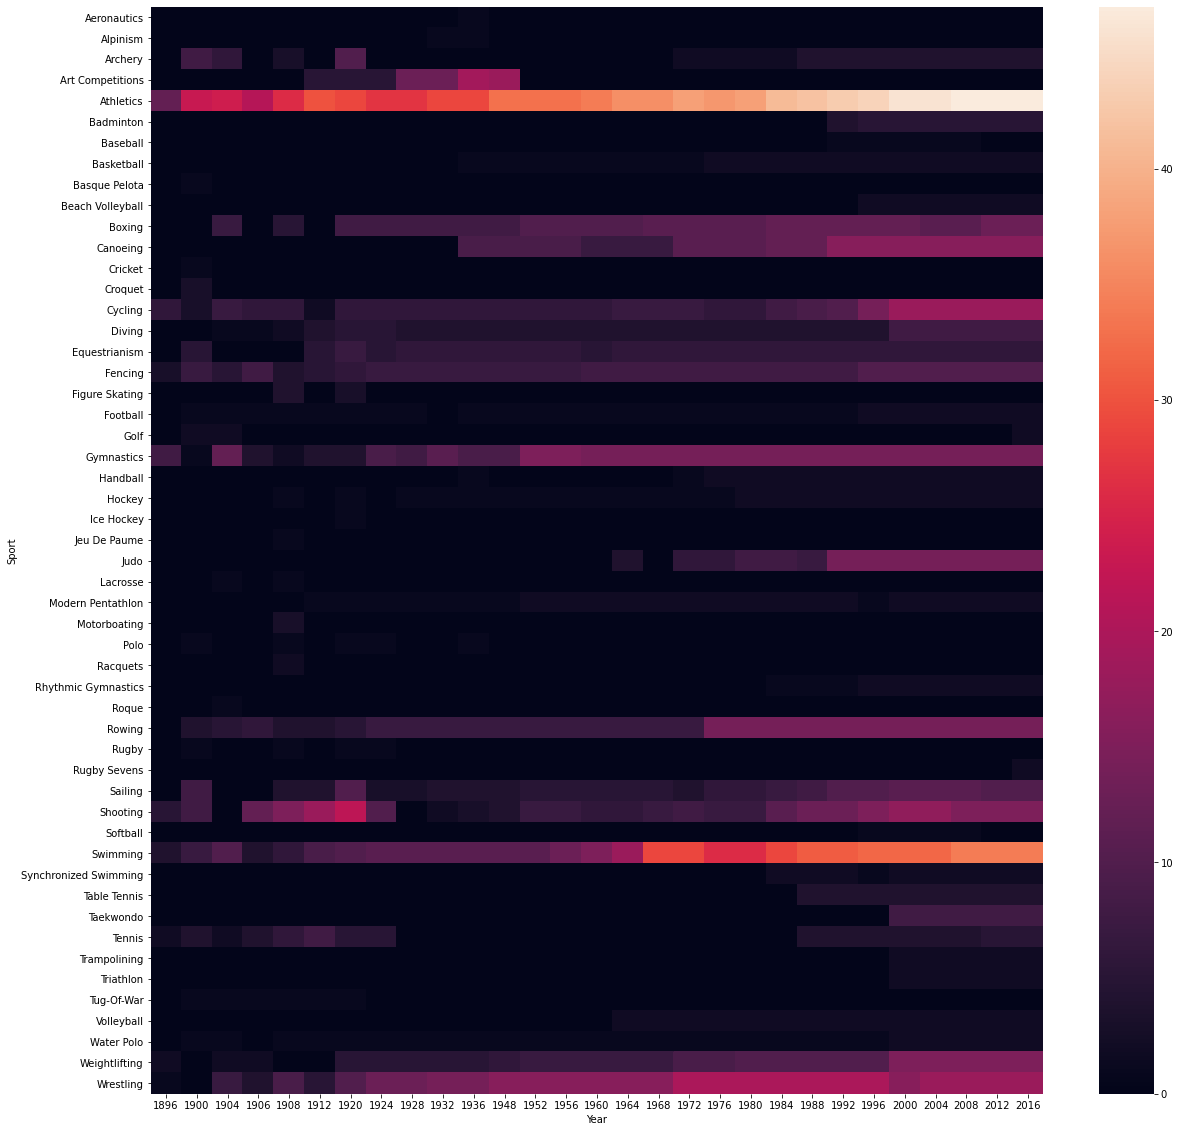

In [56]:
plt.figure(figsize=(20,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'))

<AxesSubplot:xlabel='Year', ylabel='Sport'>

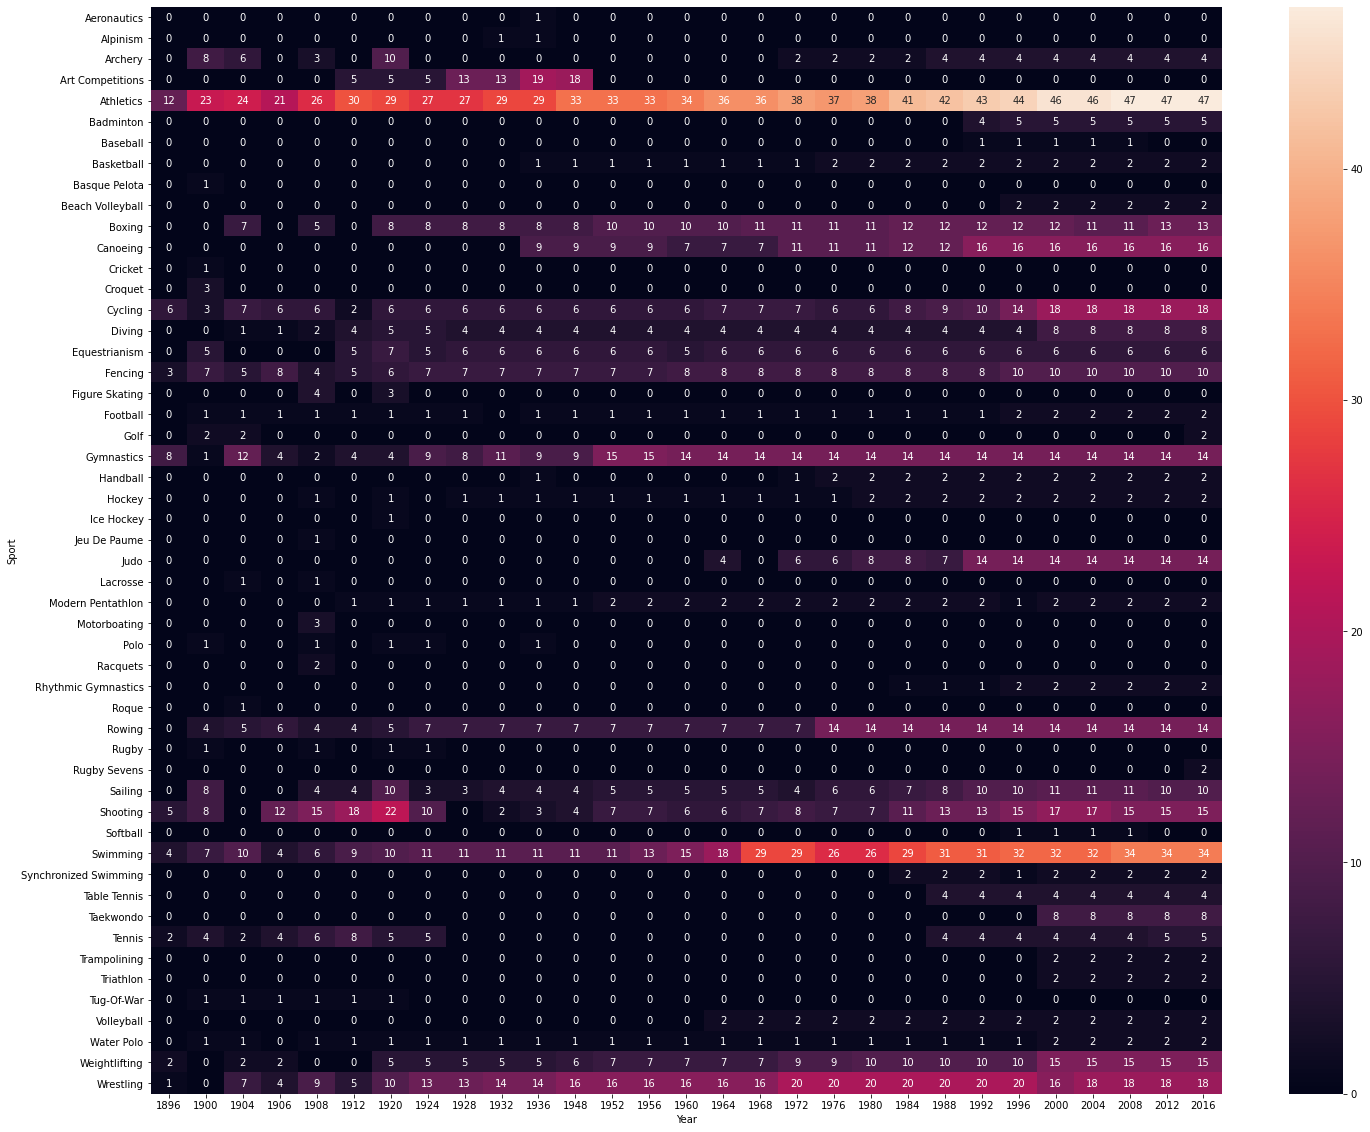

In [57]:
plt.figure(figsize=(24,20))
sns.heatmap(x.pivot_table(index='Sport',columns='Year',values='Event',aggfunc='count').fillna(0).astype('int'),annot=True)

## Most Sucessful Atheletes in Olampics

In [58]:
def most_successful(df,sport):
    temp_df=df.dropna(subset=['Medal'])
    
    if sport!= 'Overall':
        temp_df = temp_df[temp_df['Sport']==sport]
        
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport','region']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [59]:
most_successful(df,'Overall')

Name  Medals       Sport  \
0                            Michael Fred Phelps, II      28    Swimming   
30                Larysa Semenivna Latynina (Diriy-)      18  Gymnastics   
49                      Nikolay Yefimovich Andrianov      15  Gymnastics   
73                               Edoardo Mangiarotti      13     Fencing   
87                                       Takashi Ono      13  Gymnastics   
120                      Borys Anfiyanovych Shakhlin      13  Gymnastics   
144                               Ryan Steven Lochte      12    Swimming   
158                          Aleksey Yuryevich Nemov      12  Gymnastics   
179  Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12    Swimming   
196                             Paavo Johannes Nurmi      12   Athletics   
208                                       Sawao Kato      12  Gymnastics   
232             Dara Grace Torres (-Hoffman, -Minas)      12    Swimming   
245                           Birgit Fischer-Schmidt      12    Canoeing   
258                    Natalie Anne Coughlin (-Hall)      12    Swimming   
270                                Mark Andrew Spitz      11    Swimming   

      region  
0        USA  
30    Russia  
49    Russia  
73     Italy  
87     Japan  
120   Russia  
144      USA  
158   Russia  
179      USA  
196  Finland  
208    Japan  
232      USA  
245  Germany  
258      USA  
270      USA

In [60]:
most_successful(df,'Swimming')

Name  Medals     Sport  \
0                            Michael Fred Phelps, II      28  Swimming   
30                     Natalie Anne Coughlin (-Hall)      12  Swimming   
42   Jennifer Elisabeth "Jenny" Thompson (-Cumpelik)      12  Swimming   
59              Dara Grace Torres (-Hoffman, -Minas)      12  Swimming   
72                                Ryan Steven Lochte      12  Swimming   
86                                 Mark Andrew Spitz      11  Swimming   
98                    Matthew Nicholas "Matt" Biondi      11  Swimming   
110                            Franziska van Almsick      10  Swimming   
133                             Gary Wayne Hall, Jr.      10  Swimming   
143                         Zoltn Imre dn von Halmay       9  Swimming   
152                               Leisel Marie Jones       9  Swimming   
162                    Aleksandr Vladimirovich Popov       9  Swimming   
177                                 Ian James Thorpe       9  Swimming   
187                        Shirley Frances Babashoff       9  Swimming   
198                                   Inge de Bruijn       8  Swimming   

          region  
0            USA  
30           USA  
42           USA  
59           USA  
72           USA  
86           USA  
98           USA  
110      Germany  
133          USA  
143      Hungary  
152    Australia  
162       Russia  
177    Australia  
187          USA  
198  Netherlands

In [61]:
most_successful(df,'Gymnastics')

Name  Medals       Sport          region
0    Larysa Semenivna Latynina (Diriy-)      18  Gymnastics          Russia
19         Nikolay Yefimovich Andrianov      15  Gymnastics          Russia
43                          Takashi Ono      13  Gymnastics           Japan
76          Borys Anfiyanovych Shakhlin      13  Gymnastics          Russia
100                          Sawao Kato      12  Gymnastics           Japan
124             Aleksey Yuryevich Nemov      12  Gymnastics          Russia
145              Vra slavsk (-Odloilov)      11  Gymnastics  Czech Republic
163           Viktor Ivanovych Chukarin      11  Gymnastics          Russia
179           gnes Keleti-Srkny (Klein)      10  Gymnastics         Hungary
193         Polina Hryhorivna Astakhova      10  Gymnastics          Russia
212       Vitaly Venediktovich Shcherbo      10  Gymnastics          Russia
228     Aleksandr Nikolayevich Dityatin      10  Gymnastics          Russia
244                    Akinori Nakayama      10  Gymnastics           Japan
260         Mikhail Yakovlevich Voronin       9  Gymnastics          Russia
276                       Eizo Kenmotsu       9  Gymnastics           Japan

# Country wise Analysis

### Countrywise medal tally per year(line plot)

In [62]:
df

ID                                Name Sex   Age  Height  Weight  \
0            1                           A Dijiang   M  24.0   180.0    80.0   
1            2                            A Lamusi   M  23.0   170.0    60.0   
2            3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3            4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4            8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   
...        ...                                 ...  ..   ...     ...     ...   
222547  135565            Fernando scar Zylberberg   M  27.0   168.0    76.0   
222548  135566          James Francis "Jim" Zylker   M  21.0   175.0    75.0   
222549  135567        Aleksandr Viktorovich Zyuzin   M  24.0   183.0    72.0   
222550  135567        Aleksandr Viktorovich Zyuzin   M  28.0   183.0    72.0   
222551  135568              Olga Igorevna Zyuzkova   F  33.0   171.0    69.0   

                  Team  NOC        Games  Year  Season            City  \
0                China  CHN  1992 Summer  1992  Summer       Barcelona   
1                China  CHN  2012 Summer  2012  Summer          London   
2              Denmark  DEN  1920 Summer  1920  Summer       Antwerpen   
3       Denmark/Sweden  DEN  1900 Summer  1900  Summer           Paris   
4          Netherlands  NED  1932 Summer  1932  Summer     Los Angeles   
...                ...  ...          ...   ...     ...             ...   
222547       Argentina  ARG  2004 Summer  2004  Summer          Athina   
222548   United States  USA  1972 Summer  1972  Summer          Munich   
222549          Russia  RUS  2000 Summer  2000  Summer          Sydney   
222550          Russia  RUS  2004 Summer  2004  Summer          Athina   
222551         Belarus  BLR  2016 Summer  2016  Summer  Rio de Janeiro   

             Sport                                   Event Medal       region  \
0       Basketball             Basketball Men's Basketball   NaN        China   
1             Judo            Judo Men's Extra-Lightweight   NaN        China   
2         Football                 Football Men's Football   NaN      Denmark   
3       Tug-Of-War             Tug-Of-War Men's Tug-Of-War  Gold      Denmark   
4        Athletics            Athletics Women's 100 metres   NaN  Netherlands   
...            ...                                     ...   ...          ...   
222547      Hockey                     Hockey Men's Hockey   NaN    Argentina   
222548    Football                 Football Men's Football   NaN          USA   
222549      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222550      Rowing  Rowing Men's Lightweight Coxless Fours   NaN       Russia   
222551  Basketball           Basketball Women's Basketball   NaN      Belarus   

       notes  Bronze  Gold  Silver  
0        NaN       0     0       0  
1        NaN       0     0       0  
2        NaN       0     0       0  
3        NaN       0     1       0  
4        NaN       0     0       0  
...      ...     ...   ...     ...  
222547   NaN       0     0       0  
222548   NaN       0     0       0  
222549   NaN       0     0       0  
222550   NaN       0     0       0  
222551   NaN       0     0       0  

[221167 rows x 20 columns]

In [63]:
temp_df = df.dropna(subset=['Medal'])
temp_df.drop_duplicates(subset=['Team','NOC','Games','Year','City','Sport','Event','Medal'],inplace=True)

<ipython-input-63-f824732c202d>:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [64]:
new_df = temp_df[temp_df['region'] == 'India']
final_df = new_df.groupby('Year').count()['Medal'].reset_index()

In [65]:
fig = px.line(final_df,x='Year',y='Medal')
fig.show()

In [66]:
country_list = df['region'].dropna().unique().tolist()
country_list.sort()

In [67]:
country_list

['Afghanistan',
 'Albania',
 'Algeria',
 'American Samoa',
 'Andorra',
 'Angola',
 'Antigua',
 'Argentina',
 'Armenia',
 'Aruba',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bermuda',
 'Bhutan',
 'Boliva',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burundi',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Cape Verde',
 'Cayman Islands',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Cook Islands',
 'Costa Rica',
 'Croatia',
 'Cuba',
 'Curacao',
 'Cyprus',
 'Czech Republic',
 'Democratic Republic of the Congo',
 'Denmark',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guam',
 'Guatemala',
 'Guinea',
 'Guin

### What countries are good at heatmap

In [68]:
new_df = temp_df[temp_df['region'] == 'UK']
new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int')

Year               1896  1900  1904  1906  1908  1912  1920  1924  1928  1932  \
Sport                                                                           
Archery               0     0     0     0     5     0     0     0     0     0   
Art Competitions      0     0     0     0     0     0     1     1     2     1   
Athletics             2     9     2     9    17     8    12    11     5     8   
Badminton             0     0     0     0     0     0     0     0     0     0   
Boxing                0     0     0     0    14     0     6     4     0     0   
Canoeing              0     0     0     0     0     0     0     0     0     0   
Cricket               0     2     0     0     0     0     0     0     0     0   
Cycling               2     1     0     5     9     2     5     2     4     2   
Diving                0     0     0     0     0     1     1     1     0     0   
Equestrianism         0     0     0     0     0     0     0     0     0     0   
Fencing               0     0     0     1     1     1     0     1     1     1   
Figure Skating        0     0     0     0     6     0     1     0     0     0   
Football              0     2     0     1     1     1     0     0     0     0   
Golf                  0     2     0     0     0     0     0     0     0     0   
Gymnastics            0     0     0     0     1     1     0     0     1     0   
Hockey                0     0     0     0     4     0     1     0     0     0   
Jeu De Paume          0     0     0     0     2     0     0     0     0     0   
Judo                  0     0     0     0     0     0     0     0     0     0   
Lacrosse              0     0     0     0     1     0     0     0     0     0   
Modern Pentathlon     0     0     0     0     0     0     0     0     0     0   
Motorboating          0     0     0     0     2     0     0     0     0     0   
Polo                  0     3     0     0     3     0     1     1     0     0   
Racquets              0     0     0     0     6     0     0     0     0     0   
Rowing                0     1     0     0     8     4     2     2     4     2   
Rugby                 0     1     0     0     1     0     0     0     0     0   
Rugby Sevens          0     0     0     0     0     0     0     0     0     0   
Sailing               0     7     0     0     6     0     1     1     0     1   
Shooting              0     0     0     4    21     9     0     3     0     0   
Swimming              0     3     0     5     7     6     2     4     4     2   
Taekwondo             0     0     0     0     0     0     0     0     0     0   
Tennis                3    10     0     0    15     6     6     3     0     0   
Trampolining          0     0     0     0     0     0     0     0     0     0   
Triathlon             0     0     0     0     0     0     0     0     0     0   
Tug-Of-War            0     0     0     0     3     1     1     0     0     0   
Water Polo            0     2     0     0     1     1     1     0     0     0   
Weightlifting         2     0     0     0     0     0     0     0     0     0   
Wrestling             0     0     0     0    11     0     2     1     1     0   

Year               ...  1980  1984  1988  1992  1996  2000  2004  2008  2012  \
Sport              ...                                                         
Archery            ...     0     0     1     2     0     0     1     0     0   
Art Competitions   ...     0     0     0     0     0     0     0     0     0   
Athletics          ...    10    16     8     6     6     6     4     5     6   
Badminton          ...     0     0     0     0     0     1     1     0     0   
Boxing             ...     1     1     1     1     0     1     1     3     5   
Canoeing           ...     0     0     0     1     0     2     3     3     4   
Cricket            ...     0     0     0     0     0     0     0     0     0   
Cycling            ...     0     0     0     1     2     4     4    14    12   
Diving             ...     0     0     0

In [ ]:
plt.figure(figsize=(20,20))
sns.heatmap(new_df.pivot_table(index='Sport',columns='Year',values='Medal',aggfunc='count').fillna(0).astype('int'),annot=True)

<AxesSubplot:xlabel='Year', ylabel='Sport'>

In [ ]:
new_df=df.pivot_table(index='Sport',columns='Year',values='Name',aggfunc='count').fillna(0).astype('int')
new_df

In [ ]:
plt.figure(figsize=(40,20))
sns.heatmap(new_df, annot=True)

### Most successful Athletes (Top 10)

In [70]:
def most_successful(df,country):
    temp_df=df.dropna(subset=['Medal'])
    
    temp_df = temp_df[temp_df['region']==country]    
    x = temp_df['Name'].value_counts().reset_index().head(15).merge(df,left_on='index',right_on='Name',how='left')[['index','Name_x','Sport']].drop_duplicates('index')
    x.rename(columns={'index':'Name','Name_x':'Medals'},inplace=True)
    return x

In [71]:
most_successful(df,"India")

Name  Medals      Sport
0               Leslie Walter Claudius       4     Hockey
4                    Udham Singh Kular       4     Hockey
8                  Ranganathan Francis       3     Hockey
11                Randhir Singh Gentle       3     Hockey
14                    Dhyan Chand Bais       3     Hockey
17           Balbir Singh Dosanjh, Sr.       3     Hockey
20           Victor John "V. J." Peter       3     Hockey
23              Harbinder Singh Chimni       3     Hockey
26               Shankar Pillay Laxman       3     Hockey
29                     Prithipal Singh       3     Hockey
32                 Richard James Allen       3     Hockey
35                        Balbir Singh       3     Hockey
38                      Govind Perumal       2     Hockey
40  Norman Gilbert Pritchard (-Trevor)       2  Athletics
45                 Raghbir Singh Bhola       2     Hockey

# Atheletes wise Analysis

In [72]:
df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [73]:
import plotly.figure_factory as ff

In [74]:
athlete_df = df.drop_duplicates(subset=['Name','region'])

In [75]:
x1 = athlete_df['Age'].dropna()
x2 = athlete_df[athlete_df['Medal']=='Gold']['Age'].dropna()
x3 = athlete_df[athlete_df['Medal']=='Silver']['Age'].dropna()
x4 = athlete_df[athlete_df['Medal']=='Bronze']['Age'].dropna()

In [76]:
fig = ff.create_distplot([x1,x2,x3,x4],['Overall age','Gold Medalist','Silver Medalist','Bronze Medalist'],show_hist=False,show_rug=False)
fig.show()

In [77]:
famous_sports = ['Basketball','Judo','Football','Tug-Of-War','Athletics',
                     'Swimming','Badminton','Sailing','Gymnastics',
                     'Art Competitions','Handball','Weightlifting','Wrestling',
                     'Water Polo','Hockey','Rowing','Fencing','Shooting',
                     'Boxing','Taekwondo','Cycling','Diving','Canoeing',
                     'Tennis','Golf','Softball','Archery','Volleyball',
                     'Synchronized Swimming','Table Tennis','Baseball',
                     'Rhythmic Gymnastics','Rugby Sevens','Beach Volleyball',
                     'Triathlon','Ruby','Polo','Ice Hockey']

In [78]:
df.pivot_table(index='Sport',columns='Age',values='Name',aggfunc='count').fillna(0).astype('int')

Age                    10.0  11.0  12.0  13.0  14.0  15.0  16.0  17.0  18.0  \
Sport                                                                         
Aeronautics               0     0     0     0     0     0     0     0     0   
Alpinism                  0     0     0     0     0     0     0     0     0   
Archery                   0     0     0     0     3     4    13    45    90   
Art Competitions          0     0     0     0     1     0     0     2     1   
Athletics                 0     0     2     2     6    49   137   346   743   
Badminton                 0     0     0     0     0     0     1     4    16   
Baseball                  0     0     0     0     0     0     1     0     7   
Basketball                0     0     0     0     0     0     2    10    48   
Basque Pelota             0     0     0     0     0     0     0     0     0   
Beach Volleyball          0     0     0     0     0     0     0     0     1   
Boxing                    0     0     0     0     0     5    16   108   229   
Canoeing                  0     0     0     0     0     1     8    42   127   
Cricket                   0     0     0     0     0     0     0     0     0   
Croquet                   0     0     0     0     0     2     0     0     0   
Cycling                   0     0     0     0     2     2    26    64   216   
Diving                    0     0     1     9    24    52    78   167   190   
Equestrianism             0     0     0     0     0     0     2     1    17   
Fencing                   0     0     0     0     1     7    17    58    92   
Figure Skating            0     0     0     0     0     0     0     0     1   
Football                  0     0     0     0     0     5     9    54   123   
Golf                      0     0     0     0     0     1     0     6     7   
Gymnastics                1     1     3    36   322   918  1365  1209  1480   
Handball                  0     0     0     0     1     1     2    11    33   
Hockey                    0     0     0     0     0     1     7    25    54   
Ice Hockey                0     0     0     0     0     0     0     0     2   
Jeu De Paume              0     0     0     0     0     0     0     0     0   
Judo                      0     0     0     0     1     1    11    25    61   
Lacrosse                  0     0     0     0     1     0     0     0     0   
Modern Pentathlon         0     0     0     0     0     1     6     2     7   
Motorboating              0     0     0     0     0     0     0     0     0   
Polo                      0     0     0     0     0     0     0     0     0   
Racquets                  0     0     0     0     0     0     0     0     0   
Rhythmic Gymnastics       0     0     0     1     7    39    77    90   127   
Roque                     0     0     0     0     0     0     0     0     0   
Rowing                    0     1     4    12    23    23    36    39   107   
Rugby                     0     0     0     0     0     0     0     0     1   
Rugby Sevens              0     0     0     0     0     0     0     0     2   
Sailing                   0     0     0     1     1     6    16    33    59   
Shooting                  0     0     0     0     0     2    21    46    64   
Softball                  0     0     0     0     0     0     0     2     5   
Swimming                  0     4    21   110   384   882  1497  1965  2377   
Synchronized Swimming     0     0     0     0     0     8    14    30    60   
Table Tennis              0     0     0     0     0     5    23    20    38   
Taekwondo                 0     0     0     0     0     0     4    15    28   
Tennis                    0     0     0     1     2     7     6    33    76   
Trampolining              0     0     0     0     0     0     0     0     7   
Triathlon                 0     0     0     0     0     0     0     0     3   
Tug-Of-War                0     0     0     0     0     0     0     1     0   
Volleyball                0     0     0     0     

In [83]:
#plt.figure(figsize=(100,30))
#sns.heatmap(df.pivot_table(index='Sport',columns='Age',values='Name',aggfunc='count').fillna(0).astype('int'),annot=True)

In [84]:
x =[]
name = []
for sport in famous_sports:
    temp_df = athlete_df[athlete_df['Sport'] == sport]
    x.append(temp_df[temp_df['Medal'] == 'Gold']['Age'].dropna().tolist())
    name.append(sport)

In [86]:
# Give error

#fig = ff.create_distplot(x,name,show_hist=False,show_rug=False)
#fig.show()

In [87]:
athlete_df.head()

ID                                Name Sex   Age  Height  Weight  \
0   1                           A Dijiang   M  24.0   180.0    80.0   
1   2                            A Lamusi   M  23.0   170.0    60.0   
2   3                 Gunnar Nielsen Aaby   M  24.0     NaN     NaN   
3   4                Edgar Lindenau Aabye   M  34.0     NaN     NaN   
4   8  Cornelia "Cor" Aalten (-Strannood)   F  18.0   168.0     NaN   

             Team  NOC        Games  Year  Season         City       Sport  \
0           China  CHN  1992 Summer  1992  Summer    Barcelona  Basketball   
1           China  CHN  2012 Summer  2012  Summer       London        Judo   
2         Denmark  DEN  1920 Summer  1920  Summer    Antwerpen    Football   
3  Denmark/Sweden  DEN  1900 Summer  1900  Summer        Paris  Tug-Of-War   
4     Netherlands  NED  1932 Summer  1932  Summer  Los Angeles   Athletics   

                          Event Medal       region notes  Bronze  Gold  Silver  
0   Basketball Men's Basketball   NaN        China   NaN       0     0       0  
1  Judo Men's Extra-Lightweight   NaN        China   NaN       0     0       0  
2       Football Men's Football   NaN      Denmark   NaN       0     0       0  
3   Tug-Of-War Men's Tug-Of-War  Gold      Denmark   NaN       0     1       0  
4  Athletics Women's 100 metres   NaN  Netherlands   NaN       0     0       0

In [88]:
athlete_df['Medal'].fillna('No Medal',inplace=True)

C:\Users\Neelmani\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning:

Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.



<AxesSubplot:xlabel='Weight', ylabel='Height'>

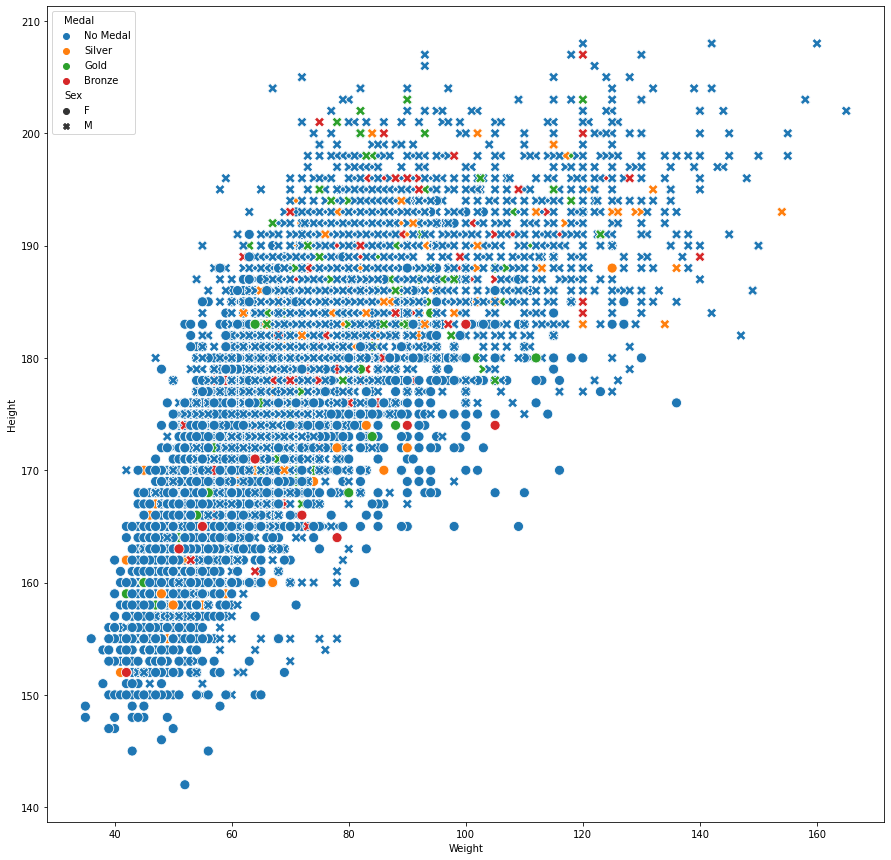

In [89]:
plt.figure(figsize=(15,15))
temp_df = athlete_df[athlete_df['Sport']=='Athletics']
sns.scatterplot(temp_df['Weight'],temp_df['Height'],hue=temp_df['Medal'],style=temp_df['Sex'],s=100)

In [90]:
men = athlete_df[athlete_df['Sex']=='M'].groupby('Year').count()['Name'].reset_index()
women = athlete_df[athlete_df['Sex']=='F'].groupby('Year').count()['Name'].reset_index()

In [91]:
final = men.merge(women,on='Year')
final.rename(columns={'Name_x':'Male','Name_y':'Female'},inplace=True)

In [92]:
final.fillna(0,inplace=True)

In [93]:
fig = px.line(final,x='Year',y=['Male','Female'])
fig.show()

### Heatmap for number of athlete with sport over the year

In [95]:
new_df = df.pivot_table(index='Sport',columns='Year',values='Name',aggfunc='count').fillna(0).astype('int')
#new_df

<AxesSubplot:xlabel='Year', ylabel='Sport'>

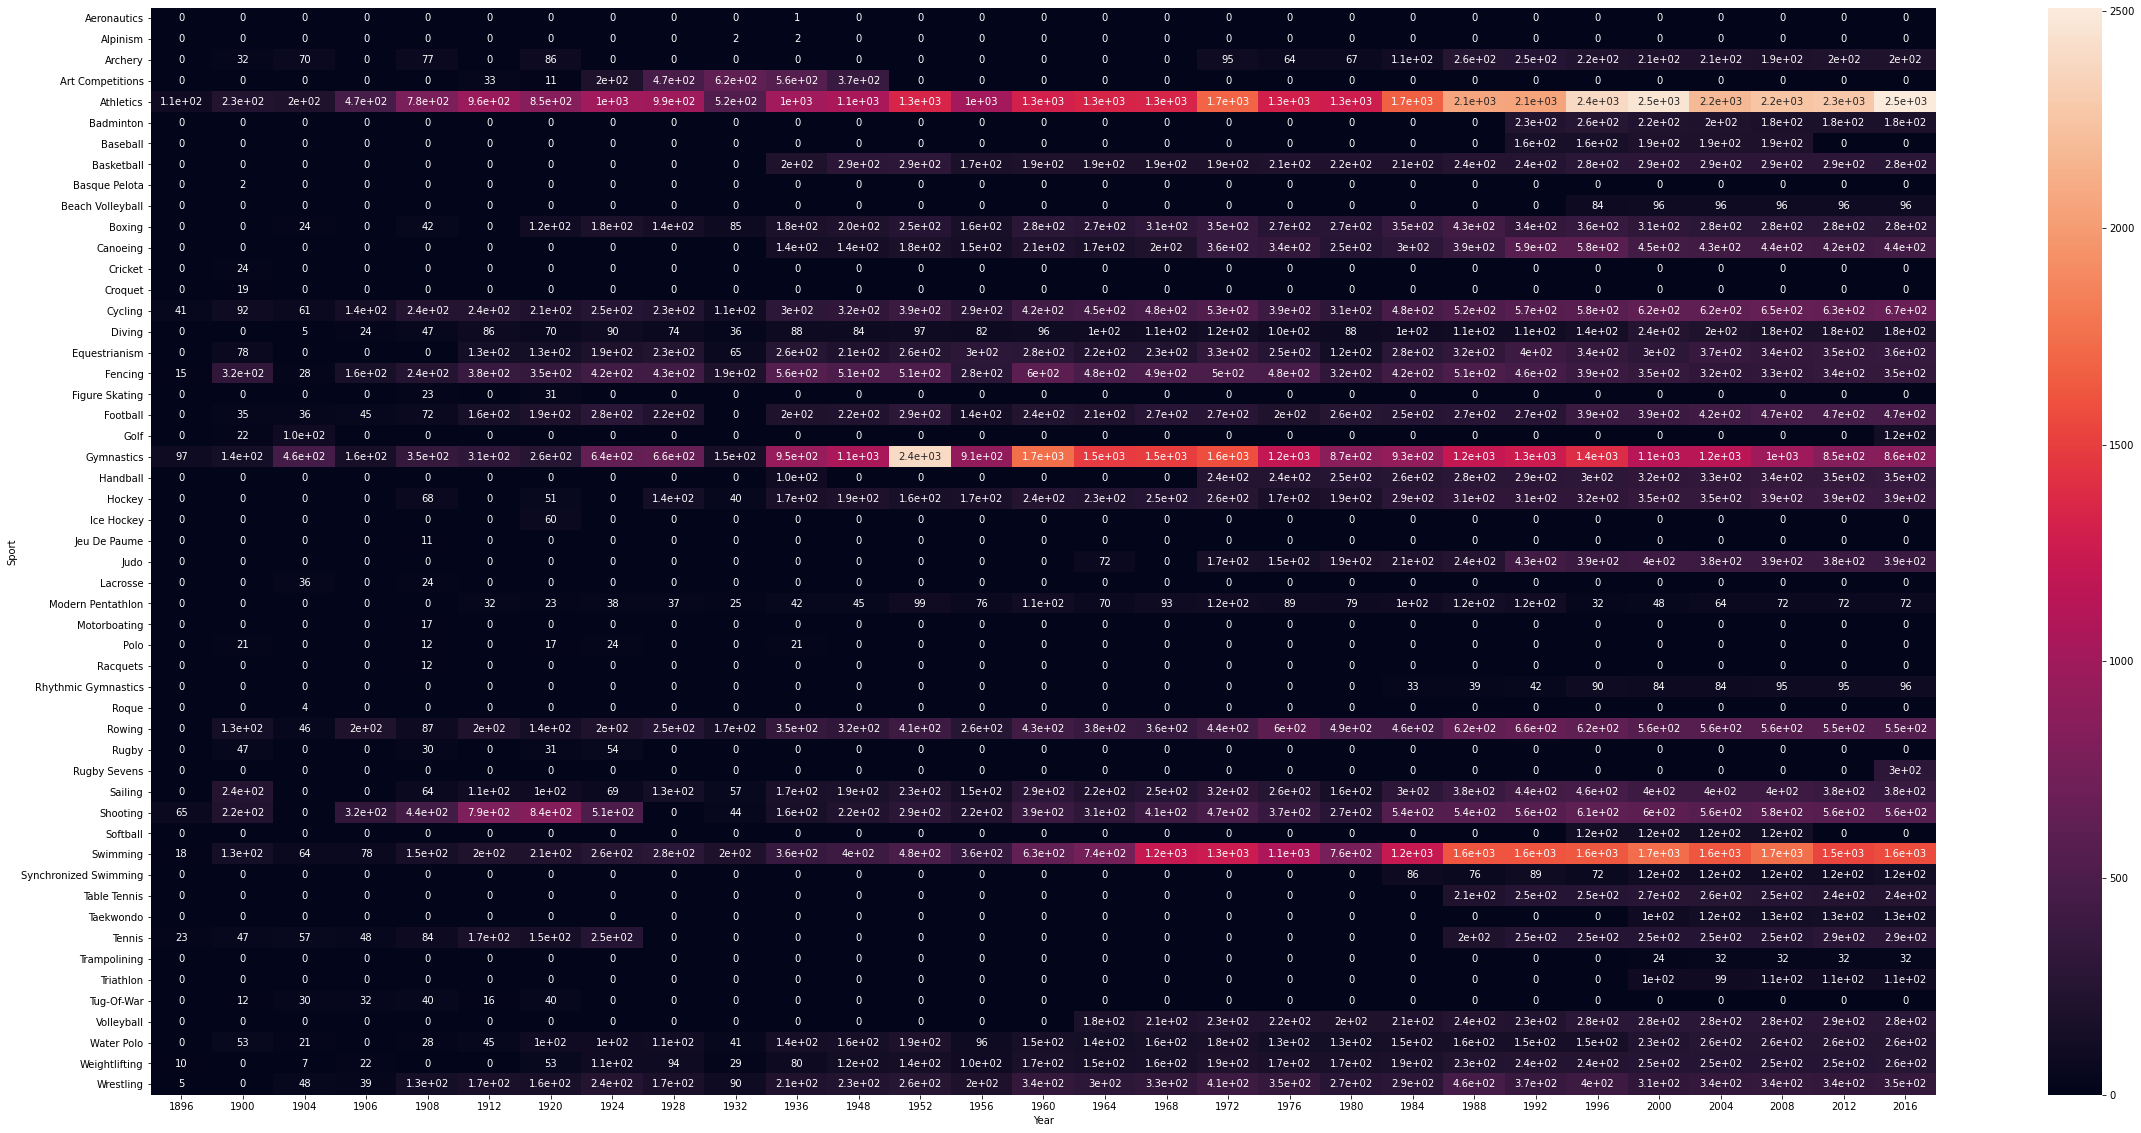

In [100]:
plt.figure(figsize=(40,20))
sns.heatmap(new_df, annot=True)